In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

group_edges_path = "member-to-group-edges.csv"
member_edges_path = "member-edges.csv"

group_edges = pd.read_csv(group_edges_path)
G1 = nx.Graph()
for _, row in group_edges.iterrows():
    G1.add_edge(f"member_{row['member_id']}", f"group_{row['group_id']}", weight=row["weight"])

member_edges = pd.read_csv(member_edges_path)
G2 = nx.Graph()
for _, row in member_edges.iterrows():
    G2.add_edge(row["member1"], row["member2"], weight=row["weight"])
    
# Attack simulation helper
def attack_graph(G, attack_strategy, steps):
    giant_component_sizes = []
    initial_size = G.number_of_nodes()
    for _ in range(steps):
        if len(G) == 0:
            break
        node_to_remove = attack_strategy(G)
        G.remove_node(node_to_remove)
        if len(G) > 0:
            giant_component = max(nx.connected_components(G), key=len)
            giant_component_sizes.append(len(giant_component) / initial_size)
        else:
            giant_component_sizes.append(0)
    return giant_component_sizes

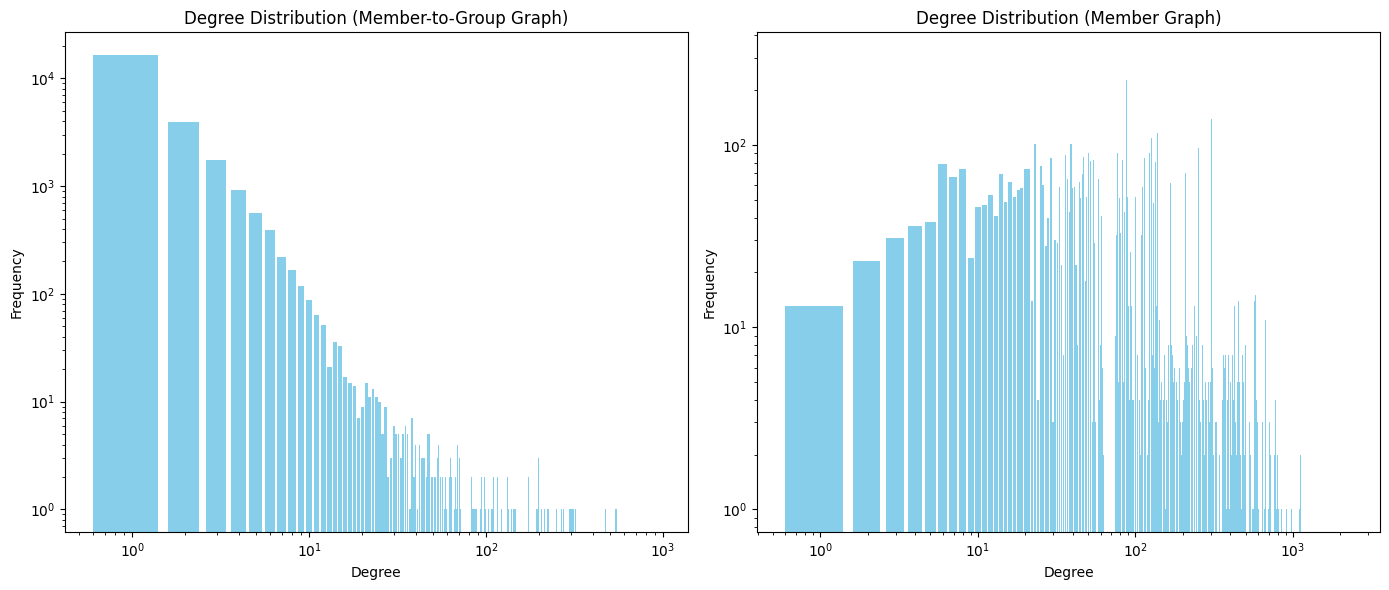

Group Graph Analysis: {'Number of Nodes': 25233, 'Number of Edges': 45583, 'Average Degree': 3.6129671461974397, 'Is Connected': 'Not Connected'}

Member Graph Analysis: {'Number of Nodes': 11372, 'Number of Edges': 1176368, 'Average Degree': 206.88849806542385, 'Is Connected': True}


In [11]:
# Helper function: plot degree distribution
def plot_degree_distribution(G, title, ax):
    degrees = [d for _, d in G.degree()]
    unique, counts = np.unique(degrees, return_counts=True)
    ax.bar(unique, counts, color="skyblue")
    ax.set_title(title)
    ax.set_xlabel("Degree")
    ax.set_ylabel("Frequency")
    ax.set_yscale("log")
    ax.set_xscale("log")


fig, axs = plt.subplots(1, 2, figsize=(14, 6))
plot_degree_distribution(G1, "Degree Distribution (Member-to-Group Graph)", axs[0])
plot_degree_distribution(G2, "Degree Distribution (Member Graph)", axs[1])
plt.tight_layout()
plt.show()


def analyze_graph(graph):
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    avg_degree = sum(dict(graph.degree()).values()) / num_nodes
    is_connected = nx.is_connected(graph) if nx.is_connected(graph) else "Not Connected"
    
    info = {
        "Number of Nodes": num_nodes,
        "Number of Edges": num_edges,
        "Average Degree": avg_degree,
        "Is Connected": is_connected,
    }
    return info

group_graph_info = analyze_graph(G1)
member_graph_info = analyze_graph(G2)

print("Group Graph Analysis:", group_graph_info)
print("\nMember Graph Analysis:", member_graph_info)

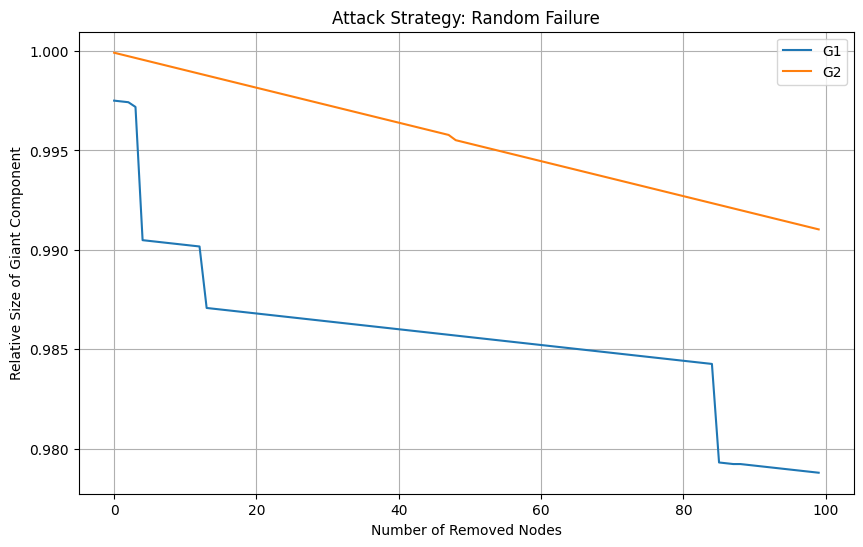

In [2]:
# Strategy: Random Failure
def random_failure(G):
    return np.random.choice(list(G.nodes))

G1_copy, G2_copy = G1.copy(), G2.copy()
results_G1 = attack_graph(G1_copy, random_failure, steps=100)
results_G2 = attack_graph(G2_copy, random_failure, steps=100)

plt.figure(figsize=(10, 6))
plt.plot(range(len(results_G1)), results_G1, label="G1")
plt.plot(range(len(results_G2)), results_G2, label="G2")
plt.xlabel("Number of Removed Nodes")
plt.ylabel("Relative Size of Giant Component")
plt.title("Attack Strategy: Random Failure")
plt.legend()
plt.grid()
plt.show()

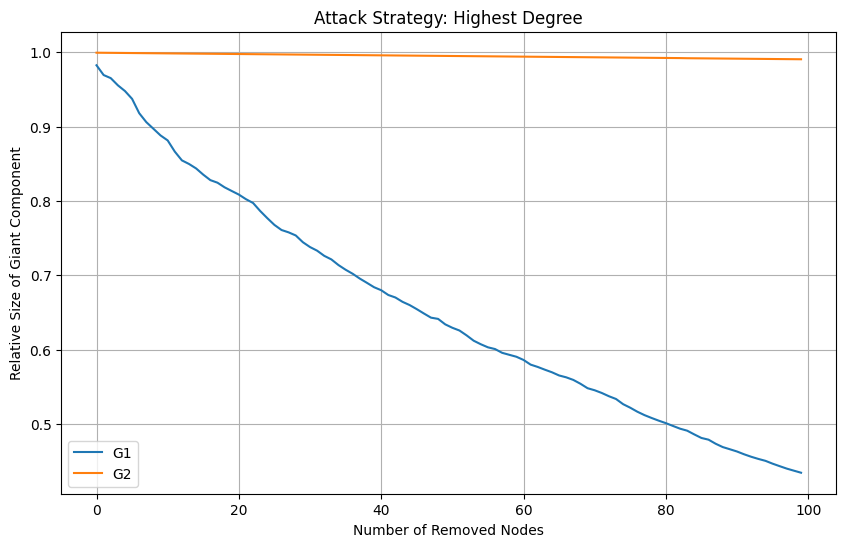

In [3]:
# Strategy: Highest Degree
def highest_degree(G):
    return max(G.degree, key=lambda x: x[1])[0]

G1_copy, G2_copy = G1.copy(), G2.copy()
results_G1 = attack_graph(G1_copy, highest_degree, steps=100)
results_G2 = attack_graph(G2_copy, highest_degree, steps=100)

plt.figure(figsize=(10, 6))
plt.plot(range(len(results_G1)), results_G1, label="G1")
plt.plot(range(len(results_G2)), results_G2, label="G2")
plt.xlabel("Number of Removed Nodes")
plt.ylabel("Relative Size of Giant Component")
plt.title("Attack Strategy: Highest Degree")
plt.legend()
plt.grid()
plt.show()

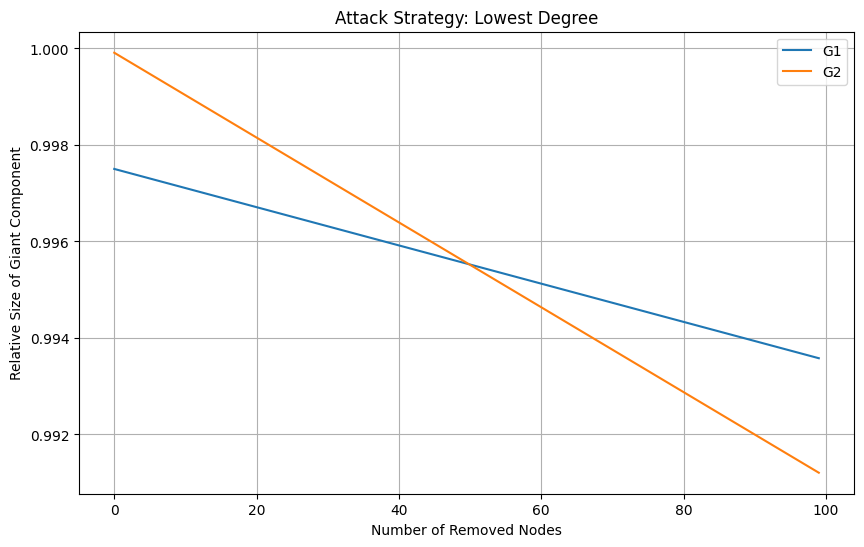

In [4]:
# Strategy: Lowest Degree
def lowest_degree(G):
    return min(G.degree, key=lambda x: x[1])[0]

G1_copy, G2_copy = G1.copy(), G2.copy()
results_G1 = attack_graph(G1_copy, lowest_degree, steps=100)
results_G2 = attack_graph(G2_copy, lowest_degree, steps=100)

plt.figure(figsize=(10, 6))
plt.plot(range(len(results_G1)), results_G1, label="G1")
plt.plot(range(len(results_G2)), results_G2, label="G2")
plt.xlabel("Number of Removed Nodes")
plt.ylabel("Relative Size of Giant Component")
plt.title("Attack Strategy: Lowest Degree")
plt.legend()
plt.grid()
plt.show()

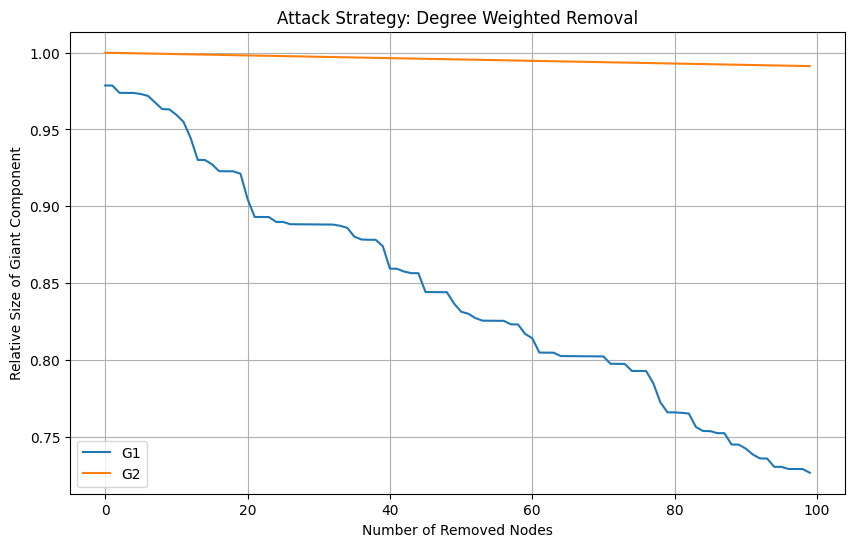

In [5]:
# Strategy: Degree Weighted Removal
def degree_weighted_removal(G):
    degrees = dict(G.degree())
    total_degree = sum(degrees.values())
    probabilities = {node: degree / total_degree for node, degree in degrees.items()}
    nodes, probs = zip(*probabilities.items())
    return np.random.choice(nodes, p=probs)

G1_copy, G2_copy = G1.copy(), G2.copy()
results_G1 = attack_graph(G1_copy, degree_weighted_removal, steps=100)
results_G2 = attack_graph(G2_copy, degree_weighted_removal, steps=100)

plt.figure(figsize=(10, 6))
plt.plot(range(len(results_G1)), results_G1, label="G1")
plt.plot(range(len(results_G2)), results_G2, label="G2")
plt.xlabel("Number of Removed Nodes")
plt.ylabel("Relative Size of Giant Component")
plt.title("Attack Strategy: Degree Weighted Removal")
plt.legend()
plt.grid()
plt.show()

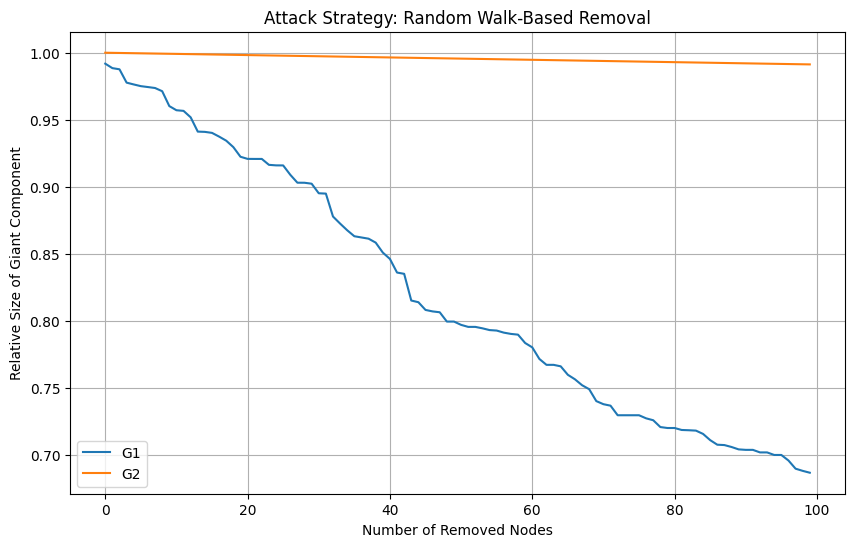

In [3]:
def random_walk_removal(G):
    current_node = np.random.choice(list(G.nodes))
    neighbors = list(G.neighbors(current_node))
    if neighbors:
        return np.random.choice(neighbors)
    return current_node

G1_copy, G2_copy = G1.copy(), G2.copy()
results_G1 = attack_graph(G1_copy, random_walk_removal, steps=100)
results_G2 = attack_graph(G2_copy, random_walk_removal, steps=100)

plt.figure(figsize=(10, 6))
plt.plot(range(len(results_G1)), results_G1, label="G1")
plt.plot(range(len(results_G2)), results_G2, label="G2")
plt.xlabel("Number of Removed Nodes")
plt.ylabel("Relative Size of Giant Component")
plt.title("Attack Strategy: Random Walk-Based Removal")
plt.legend()
plt.grid()
plt.show()

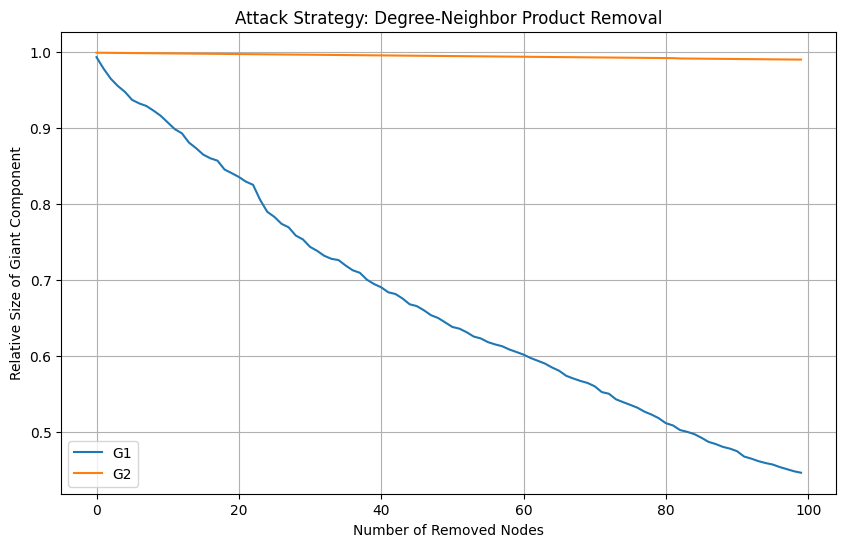

In [7]:
def degree_neighbor_product_removal(G):
    # Compute degree of each node and its neighbors
    scores = {
        node: G.degree(node) * sum(G.degree(neighbor) for neighbor in G.neighbors(node))
        for node in G.nodes
    }
    # Remove node with the highest score
    return max(scores, key=scores.get)

G1_copy, G2_copy = G1.copy(), G2.copy()
results_G1 = attack_graph(G1_copy, degree_neighbor_product_removal, steps=100)
results_G2 = attack_graph(G2_copy, degree_neighbor_product_removal, steps=100)

plt.figure(figsize=(10, 6))
plt.plot(range(len(results_G1)), results_G1, label="G1")
plt.plot(range(len(results_G2)), results_G2, label="G2")
plt.xlabel("Number of Removed Nodes")
plt.ylabel("Relative Size of Giant Component")
plt.title("Attack Strategy: Degree-Neighbor Product Removal")
plt.legend()
plt.grid()
plt.show()